# 음식관련 카드 소비 데이터 전처리



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns

In [ ]:
cards = pd.read_csv('./rowdata/04_음식관련 카드소비_CARD_SPENDING.CSV', encoding='CP949')

### 1) 음식물쓰레기데이터와 지역명이 맞지 않는 부분 바꾸기
### 2) 지역명 알수없음 데이터 삭제

In [ ]:
cards['emd_nm']= cards['emd_nm'].replace(['일도1동','일도2동', '이도1동', '이도2동', '삼도1동', '삼도2동', '용담1동', '용담2동'], ['일도일동', '일도이동', '이도일동', '이도이동', '삼도일동', '삼도이동', '용담일동', '용담이동'])
cards = cards[cards['emd_nm'] != '알수없음']

### 3) base_date 기준으로 년월일 데이터 분리

In [ ]:
cards['base_date'] = pd.to_datetime(cards['base_date'])
cards['base_year'] = cards['base_date'].dt.year
cards['base_month'] = cards['base_date'].dt.month
cards['base_day'] = cards['base_date'].dt.day
cards['base_weekday'] = cards['base_date'].dt.day_name()

### 4) EDA - 주말비주말 별로 데이터 비교를 위한 전처리 

In [ ]:
base_weekend = [];
for f in cards.index:
    if cards.loc[f]['base_weekday'] == 'Sunday' or cards.loc[f]['base_weekday'] == 'Saturday':
        base_weekend.append(True)
    else :
        base_weekend.append(False)

In [ ]:
cards['base_weekend'] = base_weekend

### 5) 우도/추자면 데이터 삭제

In [ ]:
cards =  cards[cards['emd_nm'] != '우도면']
cards = cards[cards['emd_nm'] !='추자면']
cards.groupby('emd_nm').sum().shape[0]

41

### 6) 6개 구역으로 제주도 읍명동 분리

In [ ]:
j1=['구좌읍','조천읍']
j2=['건입동','노형동','도두동','봉개동','삼도이동','삼도일동','삼양동','아라동','연동','오라동','외도동','용담이동','용담일동','이도이동','이도일동','이호동','일도이동','일도일동','화북동']
j3=['애월읍','한림읍','한경면']
s1=['성산읍','표선면','남원읍']
s2=['대륜동','대천동','동홍동','서홍동','송산동','영천동','예래동','정방동','중문동','중앙동','천지동','효돈동']
s3=['대정읍','안덕면']


region=[];
for f in cards.index:
    if cards.loc[f]['emd_nm'] in j1 :
        region.append('제주시동')
    elif cards.loc[f]['emd_nm'] in j2 :
        region.append('제주시중')
    elif cards.loc[f]['emd_nm'] in j3 :
        region.append('제주시서')    
    elif cards.loc[f]['emd_nm'] in s1 :
        region.append('서귀포동')
    elif cards.loc[f]['emd_nm'] in s2 :
        region.append('서귀포중')
    else :
        region.append('서귀포서')

In [ ]:
cards['region']= region

### 7) 필요한 컬럼만 남기기

In [ ]:
cards = cards.loc[:,['base_date','base_year', 'base_month', 'base_day','base_weekend','city','region','emd_nm','emd_cd','mct_cat_nm','mct_cat_cd','use_cnt','use_amt']]
cards

,base_date,base_year,base_month,base_day,base_weekend,city,region,emd_nm,emd_cd,mct_cat_nm,mct_cat_cd,use_cnt,use_amt
0,2018-01-06,2018,1,6,True,제주시,제주시중,연동,50110650,한식,C00100,3643,127777300
1,2018-01-09,2018,1,9,False,제주시,제주시중,연동,50110650,패스트푸드,C00500,432,6711675
2,2018-01-15,2018,1,15,False,제주시,제주시중,연동,50110650,농축수산물,C01200,236,16089579
3,2018-01-15,2018,1,15,False,제주시,제주시중,연동,50110650,마트/슈퍼마켓,A00200,4031,121979867
4,2018-01-20,2018,1,20,True,제주시,제주시중,연동,50110650,식품,C01000,633,30410674
...,...,...,...,...,...,...,...,...,...,...,...,...,...
544725,2020-05-26,2020,5,26,False,제주시,제주시중,일도이동,50110520,배달,C01400,445,10786980
544726,2020-12-08,2020,12,8,False,제주시,제주시중,일도이동,50110520,배달,C01400,513,11768033
544727,2020-04-30,2020,4,30,False,제주시,제주시중,일도이동,50110520,배달,C01400,486,11109119
544728,2020-05-28,2020,5,28,False,제주시,제주시중,일도이동,50110520,배달,C01400,353,8428342


In [ ]:
cards.to_csv("./datas/카드소비_전처리_유진.csv", index=False, encoding='CP949')

### 8) EDA- 카드소비 카테고리 분리 <요식업(외식용),주문(가계용) >

In [ ]:
cards_for_cat = pd.read_csv('./datas/카드소비_전처리_유진.csv', encoding='CP949')

In [ ]:
cards_for_cat

household = ['간식','농축수산물','마트/슈퍼마켓','배달','식품']
eatout = ['부페','아시아음식','양식','주점및주류판매','패스트푸드','한식']

mct_cat=[];
for f in cards_for_cat.index:
    if cards_for_cat.loc[f]['mct_cat_nm'] in household :
        mct_cat.append('가계용')
    elif cards_for_cat.loc[f]['mct_cat_nm'] in eatout :
        mct_cat.append('외식')
    else :
        mct_cat.append('기타')

In [ ]:
cards_for_cat['mct_cat'] = mct_cat

### 9) 요일 컬럼 추가

In [ ]:
cards_for_cat['base_date'] = pd.to_datetime(cards_for_cat['base_date'])
cards_for_cat['base_weekday'] = cards_for_cat['base_date'].dt.day_name()
cards_for_cat

,base_date,base_year,base_month,base_day,base_weekend,city,region,emd_nm,emd_cd,mct_cat_nm,mct_cat_cd,use_cnt,use_amt,mct_cat,base_weekday
0,2018-01-06,2018,1,6,True,제주시,제주시중,연동,50110650,한식,C00100,3643,127777300,외식,Saturday
1,2018-01-09,2018,1,9,False,제주시,제주시중,연동,50110650,패스트푸드,C00500,432,6711675,외식,Tuesday
2,2018-01-15,2018,1,15,False,제주시,제주시중,연동,50110650,농축수산물,C01200,236,16089579,기타,Monday
3,2018-01-15,2018,1,15,False,제주시,제주시중,연동,50110650,마트/슈퍼마켓,A00200,4031,121979867,가계용,Monday
4,2018-01-20,2018,1,20,True,제주시,제주시중,연동,50110650,식품,C01000,633,30410674,가계용,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516305,2020-05-26,2020,5,26,False,제주시,제주시중,일도이동,50110520,배달,C01400,445,10786980,가계용,Tuesday
516306,2020-12-08,2020,12,8,False,제주시,제주시중,일도이동,50110520,배달,C01400,513,11768033,가계용,Tuesday
516307,2020-04-30,2020,4,30,False,제주시,제주시중,일도이동,50110520,배달,C01400,486,11109119,가계용,Thursday
516308,2020-05-28,2020,5,28,False,제주시,제주시중,일도이동,50110520,배달,C01400,353,8428342,가계용,Thursday


In [ ]:
cat_cnt = cards_for_cat.groupby(cards_for_cat['mct_cat'])['use_amt'].sum()
weekday_cnt = cards_for_cat.groupby(cards_for_cat['base_weekday'])['use_amt'].sum()
region_cnt = cards_for_cat.groupby(cards_for_cat['region'])['use_amt'].sum()

mct_cat
가계용    3199997374071
외식     2214192440706
Name: use_amt, dtype: int64

### 10) 간단한 그래프 그리기

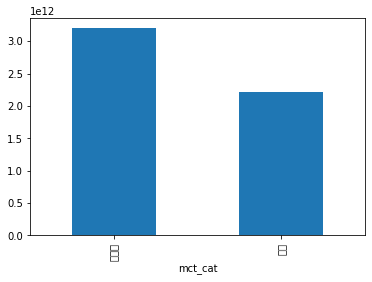

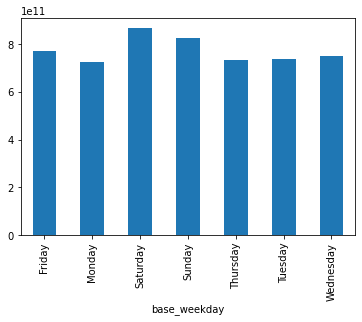

c:\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0,

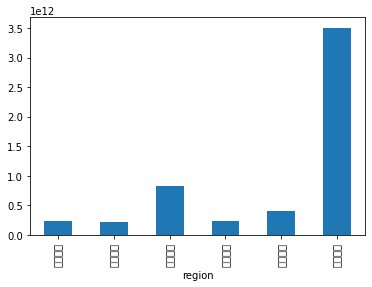

In [ ]:

from matplotlib import font_manager, rc
font_path = "./rowdata/NanumBarunGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

cat_cnt.plot(kind='bar')
plt.show()

weekday_cnt.plot(kind='bar')
plt.show()

region_cnt.plot(kind='bar')
plt.show()

In [ ]:
cards_for_cat.to_csv("./datas/카드소비_전처리_two_유진.csv", index=False, encoding='CP949')

# 카드소비 전처리 - 재범주화

In [ ]:
import pandas as pd
import numpy as np
foods = pd.read_csv('./rowdata/04_음식관련 카드소비_CARD_SPENDING.CSV', encoding='CP949')

In [ ]:
foods

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674
...,...,...,...,...,...,...,...,...
544800,2020-10-16,제주시,XXXXXXXX,알수없음,C01400,배달,5,127250
544801,2019-08-31,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,39974
544802,2020-10-03,서귀포시,XXXXXXXX,알수없음,C01400,배달,10,329832
544803,2020-10-23,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,68715


### 1) 불일치하는 변수명 및 nan 삭제

In [ ]:
foods = foods[foods['emd_nm'] != '알수없음']
foods['emd_nm']= foods['emd_nm'].replace(['일도1동','일도2동', '이도1동', '이도2동', '삼도1동', '삼도2동', '용담1동', '용담2동'], ['일도일동', '일도이동', '이도일동', '이도이동', '삼도일동', '삼도이동', '용담일동', '용담이동'])

c:\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### 2) 제주도 지역 6개 구역으로 나누기

In [ ]:
def test(x) :
  if x in ['성산읍','표선면','남원읍'] : return '서귀포시_동'
  elif x in ['대륜동','대천동','동홍동','서홍동','송산동','영천동','예래동','정방동','중문동','중앙동','천지동','효돈동'] : return '서귀포시_중'
  elif x in ['대정읍','안덕면'] : return '서귀포시_서'
  elif x in ['구좌읍','조천읍'] : return '제주시_동'
  elif x in ['건입동','노형동','도두동','봉개동','삼도이동','삼도일동','삼양동','아라동','연동','오라동','외도동','용담이동','용담일동','이도이동','이도일동','이호동','일도이동','일도일동','화북동'] : return '제주시_중'
  elif x in ['애월읍','한림읍','한경면'] : return '제주시_서'

foods['region'] = foods['emd_nm'].apply(test)

c:\python\python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


### 3) 업종별로 컬럼 생성
    - 한식 
    - 음식재료(농축수산물,식품)
    - 마트/슈퍼마켓
    - 배달
    - 기타(주점및주류판매, 간식, 아시아음식, 양식, 부페, 패스트푸드)

In [ ]:
korean = foods[foods['mct_cat_nm']=='한식']
market = foods[foods['mct_cat_nm']=='마트/슈퍼마켓']
delivery = foods[foods['mct_cat_nm']=='배달']

In [ ]:
vegi = foods[(foods['mct_cat_nm'] =='식품')|(foods['mct_cat_nm']=='농축수산물')]

echeck = (foods.mct_cat_nm =='주점및주류판매') |(foods.mct_cat_nm == '간식')|(foods.mct_cat_nm =='아시아음식')|(foods.mct_cat_nm == '양식')|(foods.mct_cat_nm =='부페')|(foods.mct_cat_nm == '패스트푸드')
etc = foods[echeck]
etc

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt,region
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675,제주시_중
5,2018-01-22,제주시,50110650,연동,C00900,주점및주류판매,49,2212446,제주시_중
6,2018-01-22,제주시,50110650,연동,C00200,양식,98,2912705,제주시_중
7,2018-01-26,제주시,50110650,연동,C00200,양식,182,7191382,제주시_중
9,2018-01-31,제주시,50110650,연동,C00500,패스트푸드,555,8944547,제주시_중
...,...,...,...,...,...,...,...,...,...
533748,2021-04-01,제주시,50110520,일도이동,C00300,아시아음식,162,5163795,제주시_중
533749,2018-09-03,제주시,50110520,일도이동,C00700,부페,5,68740,제주시_중
533750,2020-04-23,제주시,50110520,일도이동,C00400,간식,491,6233161,제주시_중
533751,2020-05-25,제주시,50110520,일도이동,C00500,패스트푸드,373,5281032,제주시_중


### 4) 업종 종류별로 나눠서 amt 값 구하기

In [ ]:
kgroup = korean.groupby(['base_date','region','emd_nm','emd_cd']).sum() 
kgroup.rename(columns={'use_amt':'use_amt_k'},inplace=True)

kgroup = kgroup.loc[:,['use_amt_k']]
kgroup

use_amt_k
base_date  region emd_nm emd_cd             
2018-01-01 서귀포시_동 남원읍    50130253   19474238
                  성산읍    50130259   15169445
                  표선면    50130320   13160715
           서귀포시_서 대정읍    50130250   20044093
                  안덕면    50130310   13282287
...                                      ...
2021-06-30 제주시_중  이도일동   50110530   12810706
                  이호동    50110680    9331254
                  일도이동   50110520   53166999
                  일도일동   50110510    4233751
                  화북동    50110600   45292736

[52357 rows x 1 columns]

In [ ]:
mgroup = market.groupby(['base_date','region','emd_nm','emd_cd']).sum() 
mgroup.rename(columns={'use_amt':'use_amt_m'},inplace=True)
mgroup =mgroup.loc[:,['use_amt_m']]

dgroup = delivery.groupby(['base_date','region','emd_nm','emd_cd']).sum() 
dgroup.rename(columns={'use_amt':'use_amt_d'},inplace=True)
dgroup =dgroup.loc[:,['use_amt_d']]

vgroup = vegi.groupby(['base_date','region','emd_nm','emd_cd']).sum() 
vgroup.rename(columns={'use_amt':'use_amt_v'},inplace=True)
vgroup =vgroup.loc[:,['use_amt_v']]

egroup = etc.groupby(['base_date','region','emd_nm','emd_cd']).sum() 
egroup.rename(columns={'use_amt':'use_amt_e'},inplace=True)
egroup =egroup.loc[:,['use_amt_e']]


### 5) 나눠진 업종별 데이터 합치기

In [ ]:
cards = pd.merge(kgroup, mgroup, left_on=['base_date','region','emd_nm','emd_cd'], right_on=['base_date','region','emd_nm','emd_cd'], how='outer')
cards = pd.merge(cards, dgroup, left_on=['base_date','region','emd_nm','emd_cd'], right_on=['base_date','region','emd_nm','emd_cd'], how='outer')

In [ ]:
cards = pd.merge(cards, vgroup, left_on=['base_date','region','emd_nm','emd_cd'], right_on=['base_date','region','emd_nm','emd_cd'], how='outer')
cards = pd.merge(cards, egroup, left_on=['base_date','region','emd_nm','emd_cd'], right_on=['base_date','region','emd_nm','emd_cd'], how='outer')
cards

use_amt_k  use_amt_m   use_amt_d  \
base_date  region emd_nm emd_cd                                       
2018-01-01 서귀포시_동 남원읍    50130253   19474238   24828201    644192.0   
                  성산읍    50130259   15169445   15468906    352538.0   
                  표선면    50130320   13160715   12063919    171850.0   
           서귀포시_서 대정읍    50130250   20044093   37142481    512113.0   
                  안덕면    50130310   13282287   17670059    299510.0   
...                                      ...        ...         ...   
2021-06-30 제주시_중  이도일동   50110530   12810706   15569460   5838643.0   
                  이호동    50110680    9331254    6601473   2551769.0   
                  일도이동   50110520   53166999   52547555  18958135.0   
                  일도일동   50110510    4233751    4383494   2853016.0   
                  화북동    50110600   45292736   48460831  13370520.0   

                                    use_amt_v  use_amt_e  
base_date  region emd_nm emd_cd                           
2018-01-01 서귀포시_동 남원읍    50130253  18592157.0    5864209  
                  성산읍    50130259   5948563.0    6757977  
                  표선면    50130320   8359864.0    3924809  
           서귀포시_서 대정읍    50130250   4144384.0    9787299  
                  안덕면    50130310   7054001.0    3509668  
...                                       ...        ...  
2021-06-30 제주시_중  이도일동   50110530  14812696.0    4999267  
                  이호동    50110680   3066187.0    2737930  
                  일도이동   50110520  63144990.0   24088369  
                  일도일동   50110510   5190155.0    2041677  
                  화북동    50110600  67918330.0   16773893  

[52357 rows x 5 columns]

### 6) NaN 처리
 - 카드소비가 NuN인 곳은 소비량이 0원이므로 0 삽입.

In [ ]:
cards.isna().sum()

use_amt_k       0
use_amt_m       0
use_amt_d    2830
use_amt_v       7
use_amt_e       0
dtype: int64

In [ ]:
nan_to_0_cards= cards.fillna(0)
nan_to_0_cards.isna().sum()

use_amt_k    0
use_amt_m    0
use_amt_d    0
use_amt_v    0
use_amt_e    0
dtype: int64

### 7)데이터 저장

In [ ]:
nan_to_0_cards = nan_to_0_cards.reset_index()

In [ ]:
nan_to_0_cards.to_csv("./datas/newdata_음식관련_카드소비.csv",index=False,encoding='CP949')